Populating the interactive namespace from numpy and matplotlib


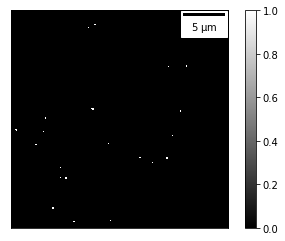

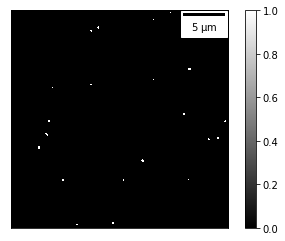

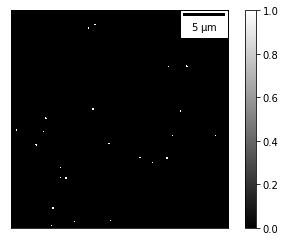

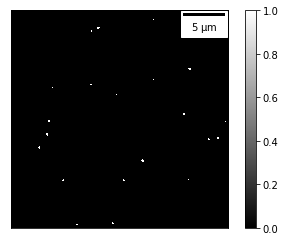

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from tirftools import get_tdms_images
from natsort import natsorted
import matplotlib.animation as animation
from tirftools import FitGauss2D
import matplotlib.cbook as cbook
from matplotlib_scalebar.scalebar import ScaleBar
import trackpy as tp


#Local file path to the .tdms images folder
data_directory = r'Q:\Val\Jan\29\trial folder'

#Get the full file path for all .tdms files
tdms_files = glob.glob(os.path.join(data_directory,'*.tdms'), recursive=True)

#Sort the filenames into ascending numerical order
sorted_tdms_files = natsorted(tdms_files)
binary_array = []
variable = 0
for file in sorted_tdms_files:
    images = get_tdms_images(file)
    mean_image = np.mean(images, axis=0)
    if sorted_tdms_files.index(file)%2 == 0:
        threshold = 900           #threshold value for 520BP
    else:
        threshold = 3.4
    for i in range(512):
        for j in range(512):
            if mean_image[i,j] >= threshold :
                mean_image[i,j] = 1
            else:
                mean_image[i,j] = 0
    binary_array.append(mean_image)
    variable = variable + 1
    fig, axs = plt.subplots()
    joe = axs.imshow(mean_image, 'binary_r')
    axs.set_xticks([])
    axs.set_yticks([])
    scalebar = ScaleBar(50*10**(-9))
    gca().add_artist(scalebar)
    fig.colorbar(joe)
    show()
    #fig.savefig(r'Q:\Val\Jan\29\trial folder\0event%s.pdf' % sorted_tdms_files.index(file)) # set name for pdf

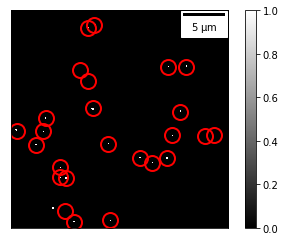

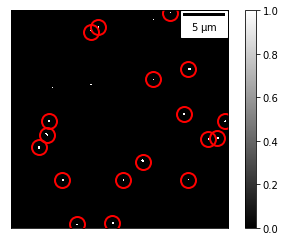

[196.2725, 181.76955602536998, 412.7275, 370.75, 163.5, 180.5, 193.80165289256198, 398.66743119266056, 81.66743119266054, 13.7275, 76.66666666666667, 478.30720338983053, 378.76955602537, 456.6666666666667, 229.7275, 59.7275, 366.7275, 303.75, 331.6666666666667, 115.75, 115.76955602536998, 129.7275, 127.75, 233.76955602536998, 148.75]
[375.6863033873343, 204.7472426470588, 188.85544217687075, 416.07117852975495, 334.5432300163132, 407.01169590643275, 503.14722222222224, 89.47138964577657, 84.81629116117851, 484.44060913705584, 463.85695006747636, 66.61749571183533, 310.8611111111111, 120.17006802721089, 263.8112175102599, 416.8041474654378, 238.27607913669064, 155.59536541889483]


In [4]:
locx = [[],[],[]]
locy = [[],[],[]]

# Find estimated particles coordinates from binary array of event0 using Trackpy

for i in range(2):         #because we're only looking at 2 images in this case
    frames = np.array(binary_array)[i,:,:]
    if i == 0:
        f = tp.locate(frames, 3, minmass=1, noise_size=0)
    else:
        f = tp.locate(frames, 5, minmass=2, noise_size=0.1)
    locx[i].extend(f['x'])
    locy[i].extend(f['y'])
    fig, axs = plt.subplots()
    joe = axs.imshow(mean_image, 'binary_r')
    axs.set_xticks([])
    axs.set_yticks([])
    scalebar = ScaleBar(50*10**(-9))
    gca().add_artist(scalebar)
    fig.colorbar(joe)
    tp.annotate(f, frames)
    show()
print(locx[0])
print(locx[1])
    #fig.savefig(r'Q:\Val\Jan\29\trial folder 2\event%s.pdf' % i)

In [6]:
threshold = 10
locx[2] = []
locy[2] = []
cx = [[],[]]
cy = [[],[]]

for x_1, y_1 in zip(locx[0], locy[0]):
    for x_2, y_2 in zip(locx[1], locy[1]):
        if (x_2 - threshold < x_1 < x_2 + threshold) and (y_2 - threshold < y_1 < y_2 +threshold):
                    cx[0].append(x_1)
                    cy[0].append(y_1)
                    cx[1].append(x_2)
                    cy[1].append(y_2)
        
    
                        
print(cx[0])
print(cx[1])

[196.2725, 181.76955602536998, 412.7275, 398.66743119266056, 81.66743119266054, 76.66666666666667, 478.30720338983053, 456.6666666666667, 59.7275, 303.75, 115.76955602536998, 129.7275, 233.76955602536998, 148.75]
[204.7472426470588, 188.85544217687075, 416.07117852975495, 407.01169590643275, 89.47138964577657, 84.81629116117851, 484.44060913705584, 463.85695006747636, 66.61749571183533, 310.8611111111111, 120.17006802721089, 120.17006802721089, 238.27607913669064, 155.59536541889483]


In [8]:
cx[0].remove(cx[0][11])  #only run once 
cx[1].remove(cx[1][11])
cy[0].remove(cy[0][11])
cy[1].remove(cy[1][11])

In [9]:
# final520 = np.zeros((512,512))
# final550 = np.zeros((512,512))
# for x_1, y_1, x_2, y_2 in zip(cx[0], cy[0], cx[1], cy[1]):
#     final520[int(x_1),int(y_1)] = 1
#     final550[int(x_2),int(y_2)] = 1
    
fig, axs = plt.subplots()
result = plt.scatter(cx[0], cy[0])
result2 = plt.scatter(cx[1], cy[1],  c = 'red')
axs.xaxis.tick_top()
plt.xlabel("x coordinate (in pixels)")
plt.ylabel("y coordinate (in pixels)")
plt.xlim(0, 512)
plt.ylim(0, 512)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().invert_yaxis()
plt.grid()
plt.draw()
plt.show()
#fig.savefig(r'Q:\Val\Jan\29\tri3\grid.pdf')


# fig, axs = plt.subplots()
# joe = axs.imshow(final520, 'viridis')
# axs.set_xticks([])
# axs.set_yticks([])
# scalebar = ScaleBar(50*10**(-9))
# gca().add_artist(scalebar)
# fig.colorbar(joe)
# f = tp.locate(final520, 3, minmass=1, noise_size=0)
# tp.annotate(f, final520)
# show()
#fig.savefig(r'Q:\Val\Jan\29\trial folder 2\greatest failure.pdf')

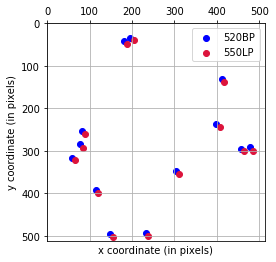

In [44]:
x_shift = 7.1447
y_shift = 6.0106
modelx = []
modely = []
for i in range(13):
    x = cx[0][i]+x_shift
    y = cy[0][i]+y_shift
    modelx.append(x)
    modely.append(y)
    
fig, axs = plt.subplots()
result = plt.scatter(cx[0], cy[0], c = 'blue', label = '520BP')
result2 = plt.scatter(cx[1], cy[1],  c = 'crimson', label = '550LP')
#result3 = plt.scatter(modelx, modely,  c = 'lime', label = 'Projection')
axs.xaxis.tick_top()
plt.xlabel("x coordinate (in pixels)")
plt.ylabel("y coordinate (in pixels)")
plt.xlim(0, 512)
plt.ylim(0, 512)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().invert_yaxis()
plt.grid()
plt.draw()
plt.show()
#fig.savefig(r'Q:\Val\Jan\29\tri3\t3.pdf')

Estimated Parameters [0.99790047 7.14471942]


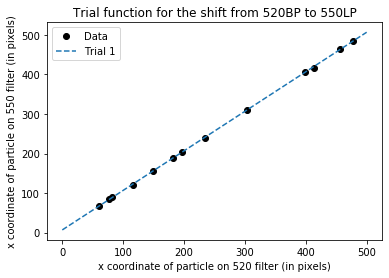

In [308]:
import scipy.optimize as opt
x_samp = cx[0]
y_samp = cx[1]
def func(x, a, b): 
    return(x*a+b)

fig, axs = plt.subplots()
plt.plot(x_samp, y_samp, "ko", label="Data")
x_lin = np.linspace(0, 500, 50)  
y_trial1 = func(x_lin, 1, 6.74)
y_trial2 = func(x_lin, 1, 7)
y_trial3 = func(x_lin, 1, 6.5)

plt.plot(x_lin, y_trial1, "--", label="Trial 1")
# plt.plot(x_lin, y_trial2, "--", label="Trial 2")
# plt.plot(x_lin, y_trial3, "--", label="Trial 3")
plt.legend()

p0 = [1,6.75]         # enter approximate initial params
w, _ = opt.curve_fit(func, x_samp, y_samp, p0=p0)
print("Estimated Parameters", w) 
y_model = func(x_lin, *w)
plt.title('Trial function for the shift from 520BP to 550LP')
plt.xlabel("x coordinate of particle on 520 filter (in pixels)")
plt.ylabel("x coordinate of particle on 550 filter (in pixels)")
#fig.savefig(r'Q:\Val\Jan\30\datafit.pdf')

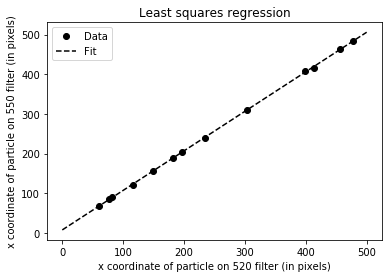

In [310]:
fig, axs = plt.subplots()
plt.plot(x_samp, y_samp, "ko", label="Data")
plt.plot(x_lin, y_model, "k--", label="Fit")
plt.title("Least squares regression")
plt.legend(loc="upper left") 
plt.xlabel("x coordinate of particle on 520 filter (in pixels)")
plt.ylabel("x coordinate of particle on 550 filter (in pixels)")
fig.savefig(r'Q:\Val\Jan\30\Least squares regression.pdf')

Estimated Parameters [1.00199482 6.01061735]


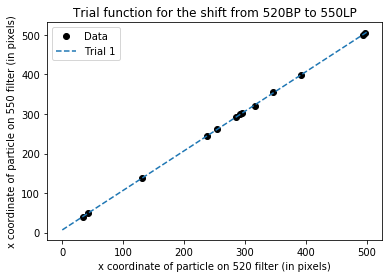

In [312]:
#same for y

x_samp = cy[0]
y_samp = cy[1]
def func(x, a, b): 
    return(x*a+b)

fig, axs = plt.subplots()
plt.plot(x_samp, y_samp, "ko", label="Data")
x_lin = np.linspace(0, 500, 50)  
y_trial1 = func(x_lin, 1, 6.74)
y_trial2 = func(x_lin, 1, 7)
y_trial3 = func(x_lin, 1, 6.5)

plt.plot(x_lin, y_trial1, "--", label="Trial 1")
# plt.plot(x_lin, y_trial2, "--", label="Trial 2")
# plt.plot(x_lin, y_trial3, "--", label="Trial 3")
plt.legend()

p0 = [1,6.75]         # enter approximate initial params
w, _ = opt.curve_fit(func, x_samp, y_samp, p0=p0)
print("Estimated Parameters", w) 
y_model = func(x_lin, *w)
plt.title('Trial function for the shift from 520BP to 550LP')
plt.xlabel("x coordinate of particle on 520 filter (in pixels)")
plt.ylabel("x coordinate of particle on 550 filter (in pixels)")
fig.savefig(r'Q:\Val\Jan\30\y\datafit.pdf')

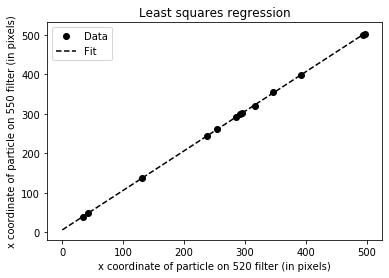

In [313]:
fig, axs = plt.subplots()
plt.plot(x_samp, y_samp, "ko", label="Data")
plt.plot(x_lin, y_model, "k--", label="Fit")
plt.title("Least squares regression")
plt.legend(loc="upper left") 
plt.xlabel("x coordinate of particle on 520 filter (in pixels)")
plt.ylabel("x coordinate of particle on 550 filter (in pixels)")
fig.savefig(r'Q:\Val\Jan\30\y\Least squares regression.pdf')

In [30]:
legend?

    

Signature: legend(*args, **kwargs)
Docstring:
Place a legend on the axes.

Call signatures::

    legend()
    legend(labels)
    legend(handles, labels)

The call signatures correspond to three different ways how to use
this method.

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    line, = ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line.set_label('Label via method')
    line, = ax.plot([1, 2, 3])
    ax.legend()

Specific lines can be excluded from the automatic legend element
selection by defining a label starting with an underscore.
This is default for all artists, so calling `Axes.legend` without
any arguments and without setting the labels manually will resu